<a href="https://colab.research.google.com/github/rht6226/DL/blob/main/Diabetes_Predictor_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Depenedencies
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
dataset = np.loadtxt('/content/drive/My Drive/Colab Notebooks/Datasets/diabetes.csv', delimiter=',')

# split into input (X) and output (y) variables
X = dataset[:, 0:8]
y = dataset[:, 8]

#Normalizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

# X after normalisation
print(X[0])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
  0.46849198  1.4259954 ]


In [60]:
print("Size of Training set :{}".format( X_train.shape[0]))
print("Size of Testing set :{}".format( X_test.shape[0]))

Size of Training set :691
Size of Testing set :77


In [77]:
# Defining the Model
model = Sequential()
model.add(Dense(16, input_dim=8, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
# Fit Keras Model
history = model.fit(X_train, y_train, epochs=250, batch_size=20, validation_data=(X_test, y_test))

Epoch 1/250
35/35 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.6411 - val_loss: 0.6945 - val_accuracy: 0.6104
Epoch 2/250
35/35 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.6512 - val_loss: 0.6535 - val_accuracy: 0.6234
Epoch 3/250
35/35 [==============================] - 0s 974us/step - loss: 0.6040 - accuracy: 0.6585 - val_loss: 0.6287 - val_accuracy: 0.6234
Epoch 4/250
35/35 [==============================] - 0s 962us/step - loss: 0.5797 - accuracy: 0.6643 - val_loss: 0.6049 - val_accuracy: 0.6234
Epoch 5/250
35/35 [==============================] - 0s 935us/step - loss: 0.5585 - accuracy: 0.6729 - val_loss: 0.5822 - val_accuracy: 0.6364
Epoch 6/250
35/35 [==============================] - 0s 1ms/step - loss: 0.5412 - accuracy: 0.7004 - val_loss: 0.5597 - val_accuracy: 0.6494
Epoch 7/250
35/35 [==============================] - 0s 924us/step - loss: 0.5253 - accuracy: 0.7352 - val_loss: 0.5413 - val_accuracy: 0.6883
Epoch

In [79]:
from sklearn.metrics import accuracy_score

# Make Prediction using sigmoid then scale it to Binary
prediction = model.predict(X_test)
prediction = prediction > 0.25

a = accuracy_score(prediction, y_test)
print('Accuracy is:', a*100, "%")

Accuracy is: 77.92207792207793 %


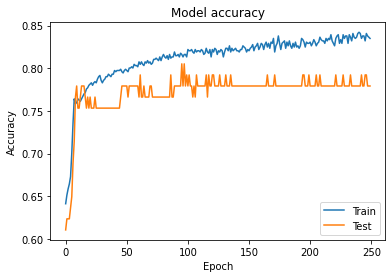

In [80]:
# Lets plot stuff

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

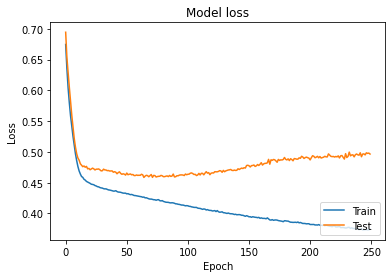

In [81]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='lower right') 
plt.show()

In [82]:
# Confusion Matrix

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true=y_test, y_pred=prediction)

In [83]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[33 15]
 [ 2 27]]


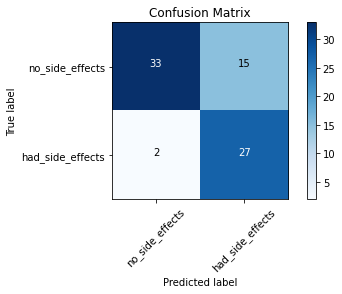

In [84]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')